Plot snapshot of depth-averaged tracer, and tracer biases.

In [1]:
import numpy as np
import xarray as xr
import cmocean as cmocean
from scipy.io import netcdf
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from xgcm import Grid
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']

In [2]:
# Snapshot
root = '/scratch/mp6191/NW2_TracerBackscatter'

exp = '/p5_noBS_KHTR0_2'
p5_noBS = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)#.isel(time = -1)
p5_noBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')
p5_static = xr.open_dataset(root + exp + '/static.nc', decode_times = False)

exp = '/p5_noBS_KHTR2400Var'
p5_noBS_KHTR = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)#.isel(time = -1)
p5_noBS_KHTR_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')

exp = '/p5_SQGBS_KHTR0_2'
p5_SQGBS = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)#.isel(time = -1)
p5_SQGBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')
exp = '/p25_noBS_2'
p25_noBS = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)#.isel(time = -1)
p25_noBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')
p25_static = xr.open_dataset(root + exp + '/static.nc', decode_times = False)

exp = '/p25_noBS_KHTR2400Var'
p25_noBS_KHTR = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)#.isel(time = -1)
p25_noBS_KHTR_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')

exp = '/p25_SQGBS_2'
p25_SQGBS = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)#.isel(time = -1)
p25_SQGBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')

exp = '/p03125_2'
p03125 = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False).isel(time = slice(None, 180, 2))#.isel(time = -1)
p03125_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')
p03125_static = xr.open_dataset(root + exp + '/static.nc', decode_times = False)

# Grid
p5_grid = Grid(p5_noBS, coords = {'X': {'center': 'xh', 'outer': 'xq'},
                                  'Y': {'center': 'yh', 'outer': 'yq'}})

p25_grid = Grid(p25_noBS, coords = {'X': {'center': 'xh', 'outer': 'xq'},
                                    'Y': {'center': 'yh', 'outer': 'yq'}})

p03125_grid = Grid(p03125, coords = {'X': {'center': 'xh', 'outer': 'xq'},
                                     'Y': {'center': 'yh', 'outer': 'yq'}})

/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Ser

In [3]:
# Mean biases
p5_noBS_mean_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p5_noBS_KHTR0_2_mean_tracer_biases.nc')
p5_noBS_KHTR_mean_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p5_noBS_KHTR2400Var_mean_tracer_biases.nc')
p5_SQGBS_mean_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p5_SQGBS_KHTR0_2_mean_tracer_biases.nc')

p25_noBS_mean_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p25_noBS_2_mean_tracer_biases.nc')
p25_noBS_KHTR_mean_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p25_noBS_KHTR2400Var_mean_tracer_biases.nc')
p25_SQGBS_mean_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p25_SQGBS_2_mean_tracer_biases.nc')

# Variance biases
p5_noBS_var_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p5_noBS_KHTR0_2_var_tracer_biases.nc')
p5_noBS_KHTR_var_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p5_noBS_KHTR2400Var_var_tracer_biases.nc')
p5_SQGBS_var_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p5_SQGBS_KHTR0_2_var_tracer_biases.nc')

p25_noBS_var_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p25_noBS_2_var_tracer_biases.nc')
p25_noBS_KHTR_var_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p25_noBS_KHTR2400Var_var_tracer_biases.nc')
p25_SQGBS_var_biases = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/MiscFields/p25_SQGBS_2_var_tracer_biases.nc')

In [4]:
def get_colors_from_cmap(cmap_name, n_colors):
    cmap = cm.get_cmap(cmap_name)
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]

blues   = get_colors_from_cmap('Blues', 10)
reds = ['#f69a8b', '#b91a38']
greys = get_colors_from_cmap('Greys', 10)

colorlist_p5 = [blues[4], reds[0]]
colorlist_p25 = [blues[8], reds[1]]
colorlist_p03125 = [greys[3], greys[5], 'k']

/state/partition1/job-65870369/ipykernel_2491407/3569882092.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)


In [5]:
def depth_integrate_c(ds, tracer_name):

    c = ds[tracer_name]
    h = ds['h']

    c_int = (h * c).sum('zl') / h.sum('zl')

    return c_int

time = 49
tracer_name = 'tracer05'

p5_noBS_c = depth_integrate_c(p5_noBS.isel(time = time), tracer_name).load()
p5_noBS_KHTR_c = depth_integrate_c(p5_noBS_KHTR.isel(time = time), tracer_name).load()
p5_SQGBS_c = depth_integrate_c(p5_SQGBS.isel(time = time), tracer_name).load()
p25_noBS_c = depth_integrate_c(p25_noBS.isel(time = time), tracer_name).load()
p25_noBS_KHTR_c = depth_integrate_c(p25_noBS_KHTR.isel(time = time), tracer_name).load()
p25_SQGBS_c = depth_integrate_c(p25_SQGBS.isel(time = time), tracer_name).load()
p03125_c = depth_integrate_c(p03125.isel(time = time), tracer_name).load()

/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute

### Plot

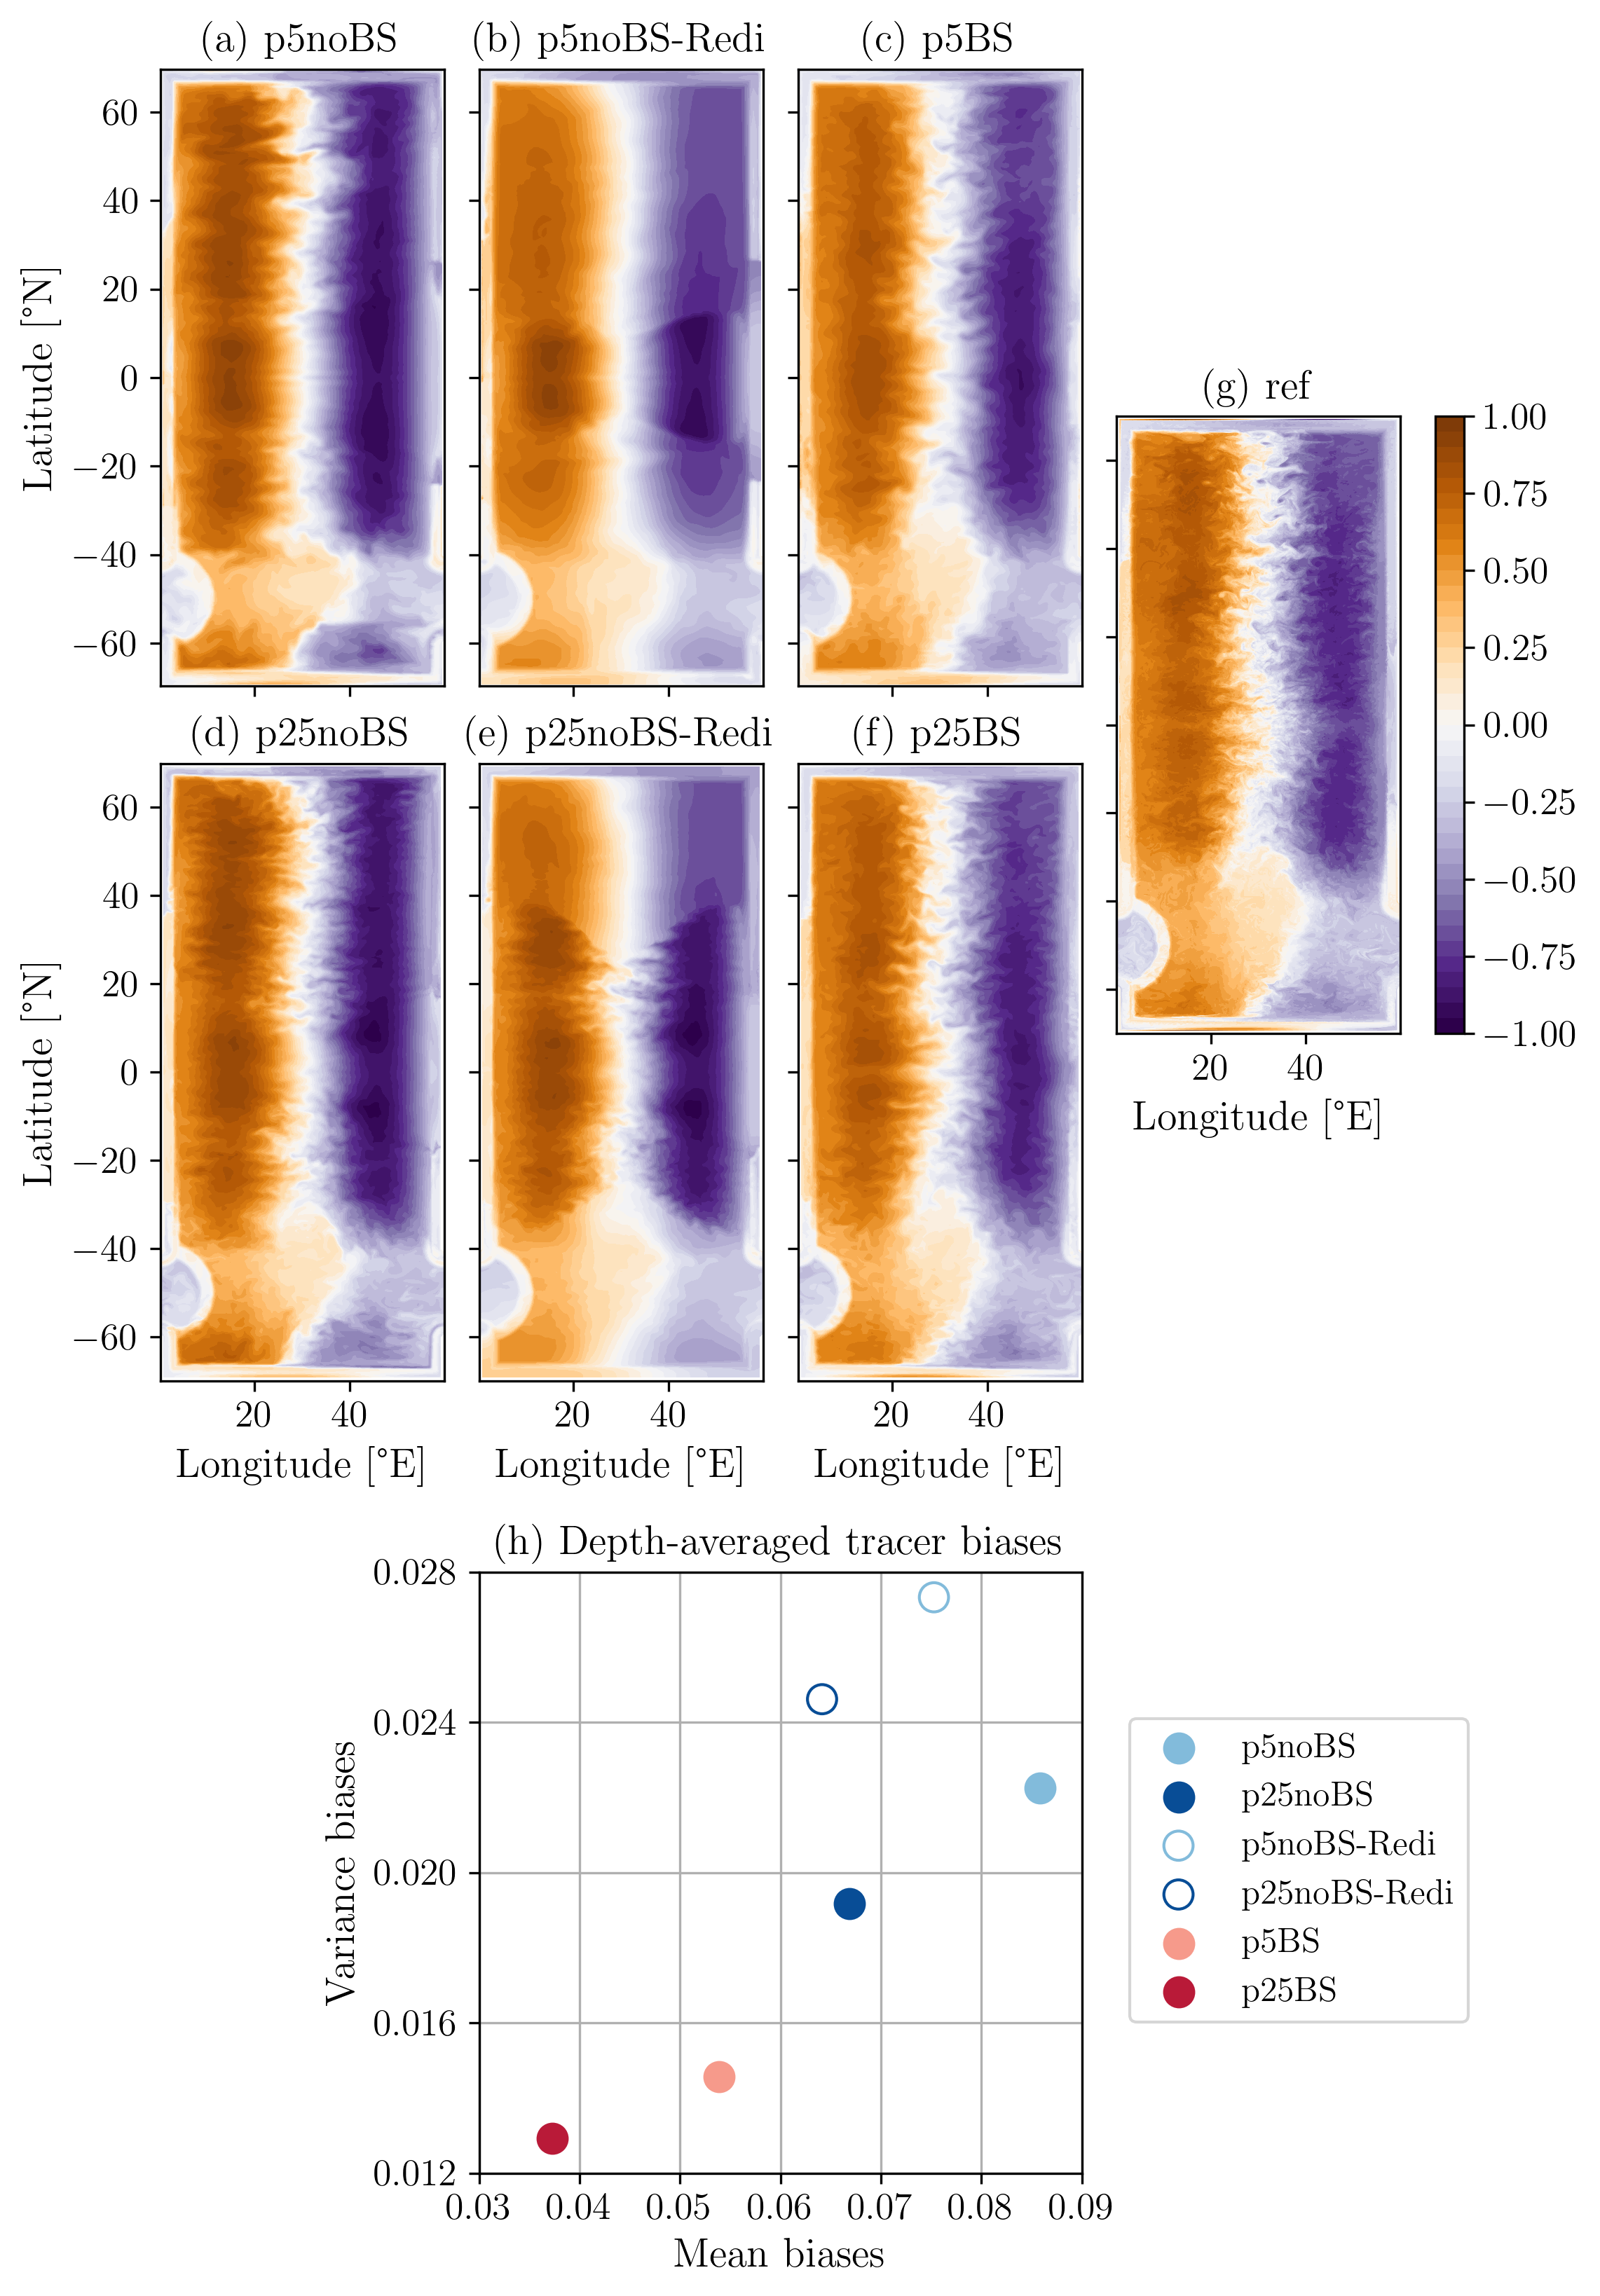

In [6]:
fig = plt.figure(figsize = (8, 13), dpi = 300)
fontsize = 14

# Main grid
outer_gs = gridspec.GridSpec(2, 1, height_ratios = [3, 1.375], figure = fig, hspace = 0.2)

# Top
top_gs = gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec = outer_gs[0], width_ratios = [1, 1, 1, 1, 0.1], wspace = 0.15, hspace = 0.125)

# Axes
axes = []
for i in range(6):
    row = i // 3
    col = i % 3
    ax = fig.add_subplot(top_gs[row, col])
    axes.append(ax)

# Get position
example_pos = axes[0].get_position()

# Compute center
top_pos = axes[0].get_position()
bottom_pos = axes[3].get_position()
vertical_center = (top_pos.y0 + bottom_pos.y1) / 2

# Match width/height
width = example_pos.width
height = example_pos.height

# Add ax7 in column 4 (index 3) manually
col3 = top_gs[:, 3]
col3_pos = fig.add_subplot(col3).get_position()
plt.delaxes(fig.axes[-1])  # Remove temp axis

# Match height of regular axes
example_pos = axes[0].get_position()
height = example_pos.height

# Vertically centre ax7
top_pos = axes[0].get_position()
bottom_pos = axes[3].get_position()
vertical_center = (top_pos.y0 + bottom_pos.y1) / 2

ax7 = fig.add_axes([
    col3_pos.x0,                 # x from GridSpec column 3
    vertical_center - height / 2,  # y centered
    col3_pos.width,             # width from GridSpec
    height                      # height same as others
])
axes.append(ax7)

# Add colorbar in column 5 (index 4)
col4 = top_gs[:, 4]
col4_pos = fig.add_subplot(col4).get_position()
plt.delaxes(fig.axes[-1])  # Remove temp axis

cbar_ax = fig.add_axes([
    col4_pos.x0,              # x-position from GridSpec
    ax7.get_position().y0,   # match y-position of ax7
    col4_pos.width,          # narrow width
    ax7.get_position().height  # match height of ax7
])

# Bottom
bottom_gs = gridspec.GridSpecFromSubplotSpec(1, 5, subplot_spec = outer_gs[1], width_ratios = [1, 1, 1, 1, 0.1], wspace = 0.15) # to match horizontal layout of top
ax8 = fig.add_subplot(bottom_gs[0, 1:-2])

### Plot
cmap = 'PuOr_r'
levels = np.linspace(-1, 1, 41)
ticks = np.linspace(-1, 1, 9)

### Tracer snapshots

# p5
ax = axes[0]
c = p5_noBS_c
c.plot.contourf(ax = ax, cmap = cmap, add_colorbar = False, levels = levels)
ax.set_ylabel('Latitude [°N]', fontsize = fontsize)
ax.set_xlabel('', fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize - 1)
ax.set_title('(a) p5noBS', fontsize = fontsize)
ax.set_xticks(np.linspace(20, 40, 2))
ax.tick_params(labelbottom = False)

ax = axes[1]
c = p5_noBS_KHTR_c
c.plot.contourf(ax = ax, cmap = cmap, add_colorbar = False, levels = levels)
ax.set_ylabel('', fontsize = fontsize)
ax.set_xlabel('', fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize - 1)
ax.set_title('(b) p5noBS-Redi', fontsize = fontsize)
ax.set_xticks(np.linspace(20, 40, 2))
ax.tick_params(labelleft = False)
ax.tick_params(labelbottom = False)

ax = axes[2]
c = p5_SQGBS_c
c.plot.contourf(ax = ax, cmap = cmap, add_colorbar = False, levels = levels)
ax.set_ylabel('', fontsize = fontsize)
ax.set_xlabel('', fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize - 1)
ax.set_title('(c) p5BS', fontsize = fontsize)
ax.set_xticks(np.linspace(20, 40, 2))
ax.tick_params(labelleft = False)
ax.tick_params(labelbottom = False)

# p25
ax = axes[3]
c = p25_noBS_c
c.plot.contourf(ax = ax, cmap = cmap, add_colorbar = False, levels = levels)
ax.set_ylabel('Latitude [°N]', fontsize = fontsize)
ax.set_xlabel('Longitude [°E]', fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize - 1)
ax.set_title('(d) p25noBS', fontsize = fontsize)
ax.set_xticks(np.linspace(20, 40, 2))

ax = axes[4]
c = p25_noBS_KHTR_c
c.plot.contourf(ax = ax, cmap = cmap, add_colorbar = False, levels = levels)
ax.set_ylabel('', fontsize = fontsize)
ax.set_xlabel('Longitude [°E]', fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize - 1)
ax.set_title('(e) p25noBS-Redi', fontsize = fontsize)
ax.tick_params(labelleft = False)
ax.set_xticks(np.linspace(20, 40, 2))

ax = axes[5]
c = p25_SQGBS_c
c.plot.contourf(ax = ax, cmap = cmap, add_colorbar = False, levels = levels)
ax.set_ylabel('', fontsize = fontsize)
ax.set_xlabel('Longitude [°E]', fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize - 1)
ax.set_title('(f) p25BS', fontsize = fontsize)
ax.tick_params(labelleft = False)
ax.set_xticks(np.linspace(20, 40, 2))

ax = axes[6]
c = p03125_c
plotted = c.plot.contourf(ax = ax, cmap = cmap, add_colorbar = False, levels = levels)
ax.set_ylabel('', fontsize = fontsize)
ax.set_ylabel('', fontsize = fontsize)
ax.set_xlabel('Longitude [°E]', fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize - 1)
ax.set_title('(g) ref', fontsize = fontsize)
ax.tick_params(labelleft = False)
ax.set_xticks(np.linspace(20, 40, 2))

# Add colorbar
cbar = fig.colorbar(plotted, cax = cbar_ax, ticks = ticks)
cbar.ax.tick_params(labelsize = fontsize - 1)
cbar.ax.minorticks_off()

### Tracer biases
def mean_variance_plot(mean, variance):
    means = np.array([mean[name].values.item() for name in list(mean.data_vars)]).mean()
    variances = np.array([variance[name].values.item() for name in list(variance.data_vars)]).mean()

    return means, variances

ax = ax8
size = 100

x, y = mean_variance_plot(p5_noBS_mean_biases, p5_noBS_var_biases)
plt.scatter(x, y, label = r'p5noBS', facecolors = colorlist_p5[0], s = size)

x, y = mean_variance_plot(p25_noBS_mean_biases, p25_noBS_var_biases)
plt.scatter(x, y, label = r'p25noBS', facecolors = colorlist_p25[0], s = size)

x, y = mean_variance_plot(p5_noBS_KHTR_mean_biases, p5_noBS_KHTR_var_biases)
plt.scatter(x, y, label = r'p5noBS-Redi', facecolors = 'none', edgecolors = colorlist_p5[0], s = size)

x, y = mean_variance_plot(p25_noBS_KHTR_mean_biases, p25_noBS_KHTR_var_biases)
plt.scatter(x, y, label = r'p25noBS-Redi', facecolors = 'none', edgecolors = colorlist_p25[0], s = size)

x, y = mean_variance_plot(p5_SQGBS_mean_biases, p5_SQGBS_var_biases)
plt.scatter(x, y, label = r'p5BS', facecolors = colorlist_p5[1], s = size)

x, y = mean_variance_plot(p25_SQGBS_mean_biases, p25_SQGBS_var_biases)
plt.scatter(x, y, label = r'p25BS', facecolors = colorlist_p25[1], s = size)

ax.set_title('(h) Depth-averaged tracer biases', fontsize = fontsize)
ax.set_xlabel('Mean biases', fontsize = fontsize)
ax.set_ylabel('Variance biases', fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize - 1)
ax.grid()
ax.legend(fontsize = fontsize - 2, bbox_to_anchor = (1.05, 0.785))
ax.set_xlim([0.03, 0.09])
ax.set_ylim([0.012, 0.028])
ax.set_yticks(np.linspace(0.012, 0.028, 5))
ax.set_xticks(np.linspace(0.03, 0.09, 7))

plt.savefig('Fig_depth_ave_tracer_biases.png', bbox_inches = 'tight', dpi = 300)